<a href="https://colab.research.google.com/github/maxstclair/DS4002/blob/main/Project_1_MI3_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MI3 analysis code. This script is a combination of different analyses, highlighting the most important and relevant findings.

## Set Up

In [ ]:
! git clone https://github.com/maxstclair/DS4002

Cloning into 'DS4002'...
remote: Enumerating objects: 662, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 662 (delta 70), reused 3 (delta 3), pack-reused 485 (from 2)
Receiving objects: 100% (662/662), 4.15 MiB | 19.93 MiB/s, done.
Resolving deltas: 100% (224/224), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
final_df = pd.read_csv('/content/DS4002/Project_1/DATA/final_restaurant_df.csv')
final_df.drop(['Unnamed: 0'], axis = 1, inplace=True)
final_df.head()

,Date,Rating,Message,Author Reviews,Restaurant,sentiment,DayOfWeek
0,2023-02-19,5.0,This place was better than the 3 Michelin-star...,82.0,Black Cow,0.9965,Sunday
1,2023-02-19,5.0,"I have to say, this place is a steakhouse like...",113.0,Black Cow,0.9674,Sunday
2,2023-02-26,5.0,Loved this place! They were completely booked ...,28.0,Black Cow,0.9937,Sunday
3,2023-05-03,4.0,"Food is excellent, best steak in a very long t...",24.0,Black Cow,0.7604,Wednesday
4,2023-08-03,5.0,The food here is incredible! The service was e...,23.0,Black Cow,0.9845,Thursday


## EDA

This code explores the data set and reveals initial patterns in the data.

In [ ]:
# dimensions
print(final_df.shape,'\n')
# observations
print(final_df.dtypes, '\n')
# variables
print(final_df.columns,'\n')
# quick view
final_df.head()

(2566, 7) 

Date               object
Rating            float64
Message            object
Author Reviews    float64
Restaurant         object
sentiment         float64
DayOfWeek          object
dtype: object 

Index(['Date', 'Rating', 'Message', 'Author Reviews', 'Restaurant',
       'sentiment', 'DayOfWeek'],
      dtype='object') 



,Date,Rating,Message,Author Reviews,Restaurant,sentiment,DayOfWeek
0,2023-02-19,5.0,This place was better than the 3 Michelin-star...,82.0,Black Cow,0.9965,Sunday
1,2023-02-19,5.0,"I have to say, this place is a steakhouse like...",113.0,Black Cow,0.9674,Sunday
2,2023-02-26,5.0,Loved this place! They were completely booked ...,28.0,Black Cow,0.9937,Sunday
3,2023-05-03,4.0,"Food is excellent, best steak in a very long t...",24.0,Black Cow,0.7604,Wednesday
4,2023-08-03,5.0,The food here is incredible! The service was e...,23.0,Black Cow,0.9845,Thursday


In [ ]:
# rating
var = 'Rating'
print(final_df[var].value_counts(), '\n')
print(final_df[var].describe(), '\n')

Rating
5.0    1401
4.0     579
3.0     259
2.0     162
1.0     153
Name: count, dtype: int64 

count    2554.000000
mean        4.140564
std         1.193161
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64 



<Axes: title={'center': 'Rating'}, ylabel='Frequency'>

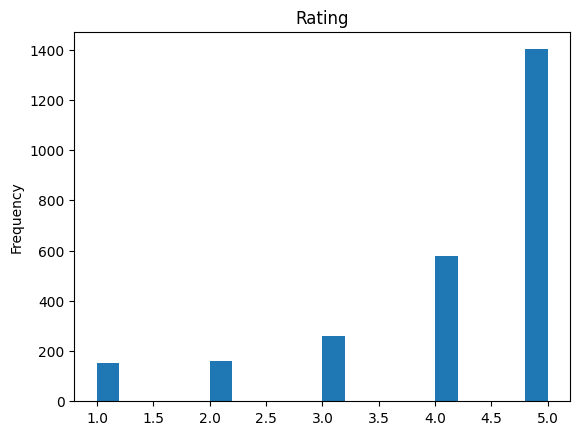

In [ ]:
final_df['Rating'].plot(kind='hist', bins=20, title='Rating')

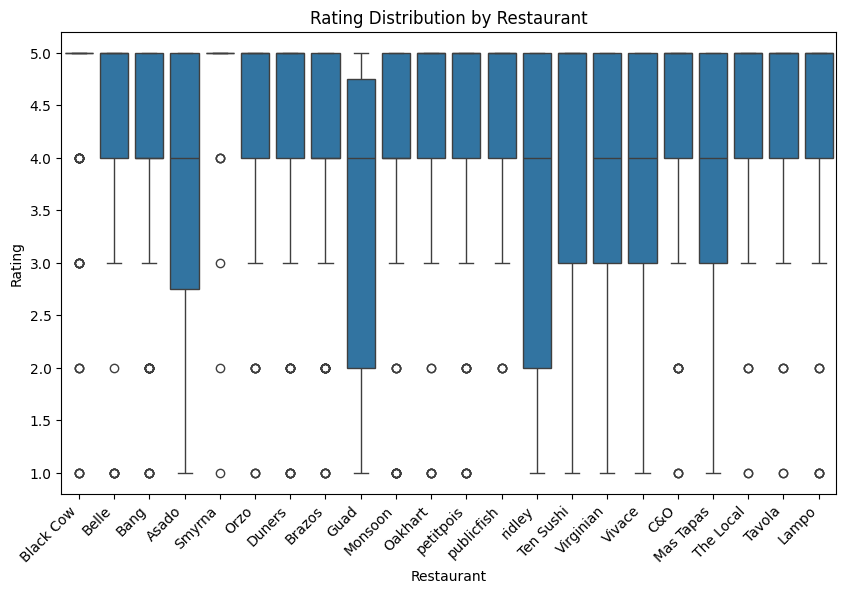

In [ ]:
# rating by restaurant
final_df = final_df.reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Restaurant', y='Rating', data=final_df)
plt.title('Rating Distribution by Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

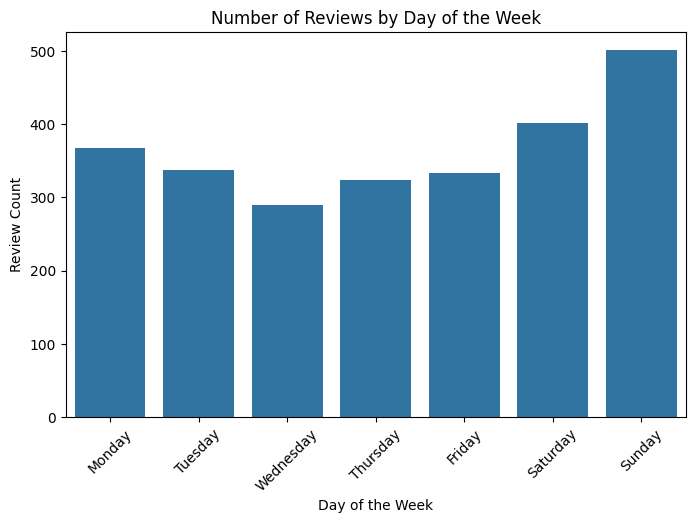

In [ ]:
# reviews by day of week
final_df['Date'] = pd.to_datetime(final_df['Date'], errors='coerce', format='mixed')
final_df['DayOfWeek'] = final_df['Date'].dt.day_name()
day_counts = final_df['DayOfWeek'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=day_counts.index, y=day_counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Reviews by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.show()

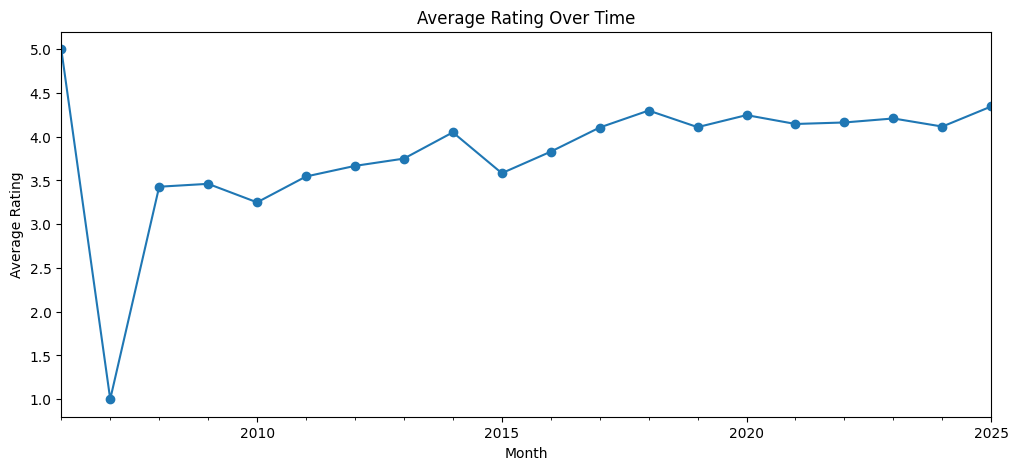

In [ ]:
# rating over time
avg_rating_per_month = final_df.groupby(final_df['Date'].dt.to_period('Y'))['Rating'].mean()

plt.figure(figsize=(12,5))
avg_rating_per_month.plot(kind='line', marker='o', title='Average Rating Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()

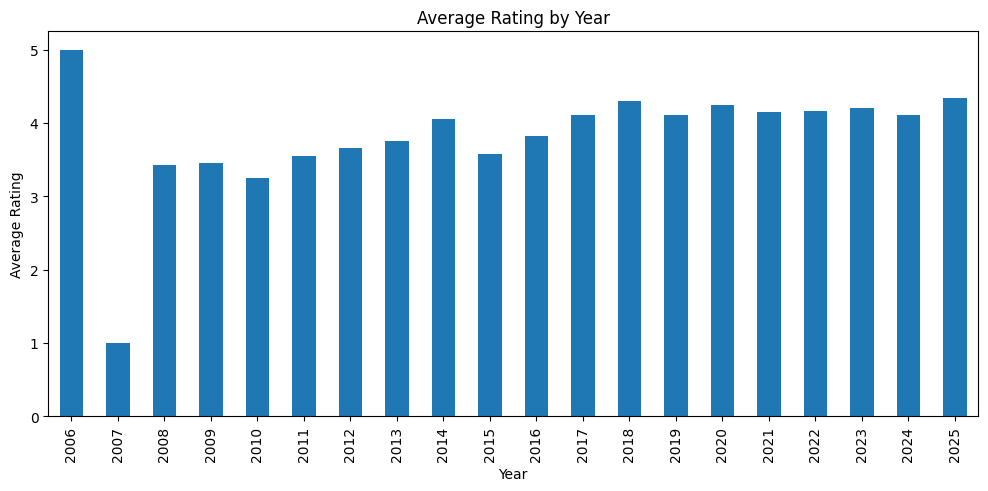

In [ ]:
# rating by year
avg_rating_per_year = final_df.groupby(final_df['Date'].dt.to_period('Y'))['Rating'].mean()

plt.figure(figsize=(12,5))
avg_rating_per_month.plot(kind='bar')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

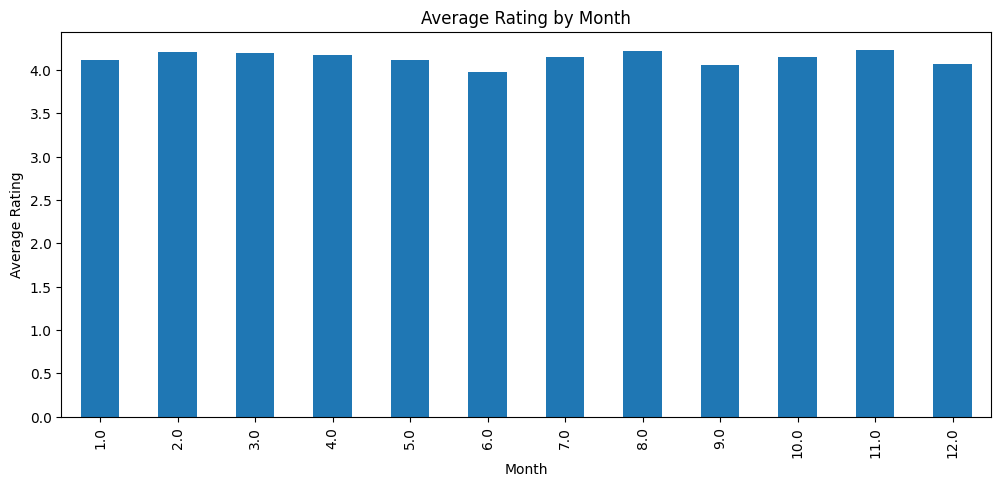

In [ ]:
# rating by month
avg_rating_per_month = final_df.groupby(final_df['Date'].dt.month)['Rating'].mean()

# Plot as a bar chart
plt.figure(figsize=(12,5))
avg_rating_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.title('Average Rating by Month')
plt.show()

In [ ]:
# sentiment
avg_rating_by_restaurant = final_df.groupby(final_df['Restaurant'])['Rating'].mean().sort_values(ascending=False)
avg_sentiment_by_restaurant = final_df.groupby(final_df['Restaurant'])['sentiment'].mean().sort_values(ascending=False)

from IPython.display import display_html

html1 = avg_rating_by_restaurant.to_frame().to_html()
html2 = avg_sentiment_by_restaurant.to_frame().to_html()

html_side_by_side = f"""
        {html1}
        {html2}
"""

display_html(html_side_by_side, raw=True)

,Rating
Restaurant,
Smyrna,4.848101
publicfish,4.591667
Oakhart,4.541667
Black Cow,4.494845
Lampo,4.491667
The Local,4.366667
Orzo,4.366667
Tavola,4.366667
C&O,4.333333


In [ ]:
# sentiment by restaurant
print(avg_sentiment_by_restaurant)

Restaurant
Smyrna        0.888400
Orzo          0.868048
C&O           0.867908
publicfish    0.864860
The Local     0.863213
Tavola        0.863213
Mas Tapas     0.851382
Oakhart       0.827202
Black Cow     0.820759
Lampo         0.799838
Ten Sushi     0.795003
Monsoon       0.794718
petitpois     0.788126
Duners        0.783151
Belle         0.776090
Brazos        0.769115
Bang          0.763611
Virginian     0.758405
Vivace        0.752083
Asado         0.638341
ridley        0.534102
Guad          0.525811
Name: sentiment, dtype: float64


In [ ]:
# sentiment vs. rating
final_df.groupby(final_df['Rating'])['sentiment'].mean()

,sentiment
Rating,
1.0,-0.137622
2.0,0.318137
3.0,0.673005
4.0,0.888539
5.0,0.917964


In [ ]:
# sentiment correlations
sentiment_rating = final_df['sentiment'].corr(final_df['Rating'])
sentiment_number = final_df['sentiment'].corr(final_df['Author Reviews'])
rating_number = final_df['Rating'].corr(final_df['Author Reviews'])
correlation = pd.DataFrame({'Feature': ['Sentiment vs Rating', 'Sentiment vs Number of Reviews', 'Rating vs Number of Reviews'],
                            'Correlaltion': [sentiment_rating, sentiment_number, rating_number]})
correlation

,Feature,Correlaltion
0,Sentiment vs Rating,0.615227
1,Sentiment vs Number of Reviews,0.057661
2,Rating vs Number of Reviews,0.015339


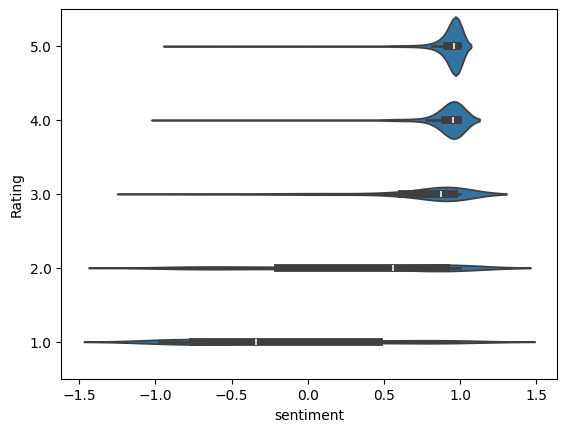

In [ ]:
# violin plot
sns.violinplot(x='sentiment', y='Rating', data=final_df, orient='h').invert_yaxis()
plt.show()

<ipython-input-17-abce84f01996>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = plotdf.groupby(['rating_bin', 'sentiment_bin']).size().unstack(fill_value=0)


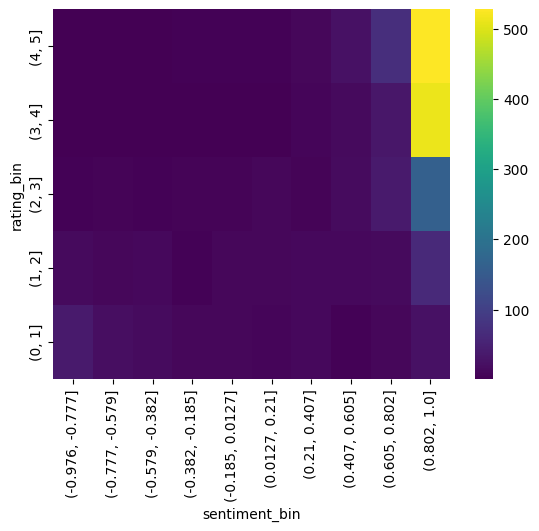

In [ ]:
# heatmap
plotdf = pd.DataFrame()
plotdf['sentiment_bin'] = pd.cut(final_df['sentiment'], bins=10)
plotdf['rating_bin'] = pd.cut(final_df['Rating'], bins=range(0,6))

heatmap_data = plotdf.groupby(['rating_bin', 'sentiment_bin']).size().unstack(fill_value=0)

sns.heatmap(heatmap_data, cmap='viridis', robust=True).invert_yaxis()
plt.show()

## Regression

This code performs a regression predicting average rating using average sentiment

In [ ]:
import statsmodels.api as sm

# regression analysis
avg_rating_by_restaurant = final_df.groupby(final_df['Restaurant'])['Rating'].mean()
avg_sentiment_by_restaurant = final_df.groupby(final_df['Restaurant'])['sentiment'].mean()
avg_df = pd.concat([avg_rating_by_restaurant, avg_sentiment_by_restaurant], axis=1)
avg_df.columns = ['avg_rating', 'avg_sentiment']

x = avg_df['avg_sentiment'].values.reshape(-1, 1)
y = avg_df['avg_rating'].values.reshape(-1, 1)

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

beta0 = model.params[0]
beta1 = model.params[1]
yhat = beta0 + beta1 * x

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     69.77
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           5.95e-08
Time:                        19:24:48   Log-Likelihood:                 6.8484
No. Observations:                  22   AIC:                            -9.697
Df Residuals:                      20   BIC:                            -7.515
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4670      0.323      4.536      0.0

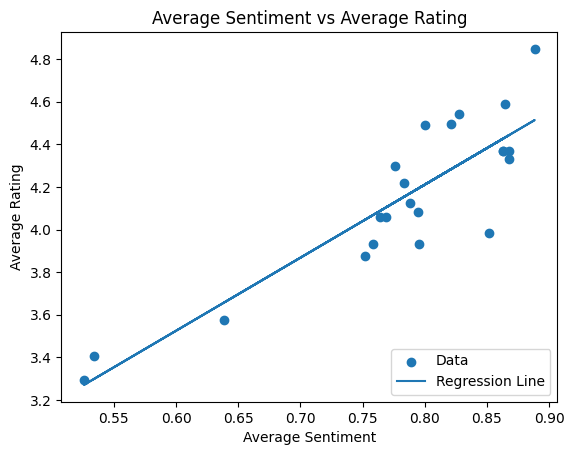

In [ ]:
# regression plot
plt.scatter(avg_sentiment_by_restaurant, avg_rating_by_restaurant, label='Data')
plt.xlabel('Average Sentiment')
plt.ylabel('Average Rating')
plt.title('Average Sentiment vs Average Rating')
plt.plot(x,yhat,label='Regression Line')
plt.legend(loc='lower right')
plt.show()

## Seasonality

This code performs an analysis on the relevance of season and weather to restaurant reviews.

In [ ]:
# season dummy variables
season_df = final_df.copy()
season_df['month'] = pd.to_datetime(season_df['Date']).dt.month
season_df['winter'] = season_df['month'].isin([12,1,2]).astype(int)
season_df['summer'] = season_df['month'].isin([6,7,8]).astype(int)
season_df.head(5)

,Date,Rating,Message,Author Reviews,Restaurant,sentiment,DayOfWeek,month,winter,summer
0,2023-02-19,5.0,This place was better than the 3 Michelin-star...,82.0,Black Cow,0.9965,Sunday,2.0,1,0
1,2023-02-19,5.0,"I have to say, this place is a steakhouse like...",113.0,Black Cow,0.9674,Sunday,2.0,1,0
2,2023-02-26,5.0,Loved this place! They were completely booked ...,28.0,Black Cow,0.9937,Sunday,2.0,1,0
3,2023-05-03,4.0,"Food is excellent, best steak in a very long t...",24.0,Black Cow,0.7604,Wednesday,5.0,0,0
4,2023-08-03,5.0,The food here is incredible! The service was e...,23.0,Black Cow,0.9845,Thursday,8.0,0,1


In [ ]:
# fixed effects model
import statsmodels.formula.api as smf

model = smf.mixedlm(
    formula="sentiment ~ summer",
    data=season_df,
    groups=season_df['Restaurant'],
    re_formula="~summer"
)
result = model.fit(method='bfgs')
result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:               MixedLM  Dependent Variable:  sentiment 
No. Observations:    2566     Method:              REML      
No. Groups:          22       Scale:               0.1719    
Min. group size:     80       Log-Likelihood:      -1408.6755
Max. group size:     121      Converged:           Yes       
Mean group size:     116.6                                   
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.777    0.024 32.994 0.000  0.731  0.824
summer              0.013    0.021  0.635 0.526 -0.028  0.054
Group Var           0.010    0.009                           
Group x summer Cov -0.004    0.007                           
summer Var          0.002    0.007                           
=============================================================

"""

In [ ]:
# results
re_df = result.random_effects
re_df

{'Asado': Group    -0.138892
 summer    0.053627
 dtype: float64,
 'Bang': Group    -0.013133
 summer    0.003226
 dtype: float64,
 'Belle': Group    -0.001083
 summer   -0.002653
 dtype: float64,
 'Black Cow': Group     0.027907
 summer   -0.005197
 dtype: float64,
 'Brazos': Group    -0.013721
 summer    0.006701
 dtype: float64,
 'C&O': Group     0.084654
 summer   -0.034370
 dtype: float64,
 'Duners': Group    -0.004267
 summer    0.005020
 dtype: float64,
 'Guad': Group    -0.255947
 summer    0.105454
 dtype: float64,
 'Lampo': Group     0.027859
 summer   -0.017462
 dtype: float64,
 'Mas Tapas': Group     0.079588
 summer   -0.037710
 dtype: float64,
 'Monsoon': Group     0.019563
 summer   -0.011821
 dtype: float64,
 'Oakhart': Group     0.036181
 summer   -0.007637
 dtype: float64,
 'Orzo': Group     0.082511
 summer   -0.030777
 dtype: float64,
 'Smyrna': Group     0.090378
 summer   -0.031337
 dtype: float64,
 'Tavola': Group     0.072647
 summer   -0.023121
 dtype: float64,

predict confidence intervals and statistical significance for restuarant-level total effects
Function returns a dataframe with each restaurant's aggregate slope for seasonal effects (total effect = beta_1 + b_{season, restaurant}) and gives an approximate confidence interval Parameters

result: the fitted statsmodels MixedLMResults object
alpha: significance level for confidence interval estimates, default = 0.05
Note: This is a frequentist approximation rather than a direct parameter estimate. It assumes fixed probabilities and ignores covariance between overall seasonal effect and fixed-effects at the restuarant level.

In [ ]:
def get_restaurant_slope_intervals(result, alpha=0.05):
    # beta1: overall fixed effect
    beta_1 = result.params["summer"]
    var_beta_1 = result.cov_params().loc["summer", "summer"]

    # variance of restuarant-level slope on summer dummy
    var_b1 = result.cov_re.loc["summer", "summer"]

    # standard error approximation ignoring covariance term
    se_approx = np.sqrt(var_beta_1 + var_b1)

    # accepts alpha values of 0.05, 0.01, and 0.1 to approximate z statistic
    z = 1.96 if alpha == 0.05 else 2.575 if alpha == 0.01 else 1.645 if alpha == 0.10 else 1.96

    rows = []
    for group_id, re_dict in result.random_effects.items():
        # random slope for "season" in that restaurant
        b1_r = re_dict.get("summer")
        slope_est = beta_1 + b1_r

        # compute 95% confidence interval using approx z statistic
        lower = slope_est - z * se_approx
        upper = slope_est + z * se_approx

        # significant if upper and lower estimates have same sign
        significant = (lower*upper)>0

        rows.append({
            "restaurant_id": group_id,
            "slope_estimate": slope_est,
            "ci_lower": lower,
            "ci_upper": upper,
            "significant at " + str(alpha):significant
        })

    return pd.DataFrame(rows)

In [ ]:
get_restaurant_slope_intervals(result, alpha=0.05)

,restaurant_id,slope_estimate,ci_lower,ci_upper,significant at 0.05
0,Asado,0.066935,-0.028340,0.162211,False
1,Bang,0.016534,-0.078741,0.111809,False
2,Belle,0.010655,-0.084620,0.105930,False
3,Black Cow,0.008111,-0.087164,0.103386,False
4,Brazos,0.020009,-0.075266,0.115285,False
5,C&O,-0.021062,-0.116338,0.074213,False
6,Duners,0.018328,-0.076948,0.113603,False
7,Guad,0.118762,0.023487,0.214038,True
8,Lampo,-0.004154,-0.099430,0.091121,False
9,Mas Tapas,-0.024402,-0.119677,0.070874,False


In [ ]:
get_restaurant_slope_intervals(result, alpha=0.1)

,restaurant_id,slope_estimate,ci_lower,ci_upper,significant at 0.1
0,Asado,0.066935,-0.013028,0.146899,False
1,Bang,0.016534,-0.063429,0.096497,False
2,Belle,0.010655,-0.069308,0.090618,False
3,Black Cow,0.008111,-0.071852,0.088074,False
4,Brazos,0.020009,-0.059954,0.099973,False
5,C&O,-0.021062,-0.101025,0.058901,False
6,Duners,0.018328,-0.061635,0.098291,False
7,Guad,0.118762,0.038799,0.198726,True
8,Lampo,-0.004154,-0.084117,0.075809,False
9,Mas Tapas,-0.024402,-0.104365,0.055562,False


Result: at 5% signficance level, Guad is estimated to be the only restaurant with signficant impact of seasonality, with a positive coefficient implying a lift in review sentiment during the summer months. No restaurant is significant at the 1% level, and the Ridley also shows a significant effect at the 10% level. It's interesting to see that both of these restaurants are lower-rated relative to the group, whereas most restaurants we tested had overwhelmingly positive reveiws which may be a reason that seasonal variation was not detected.

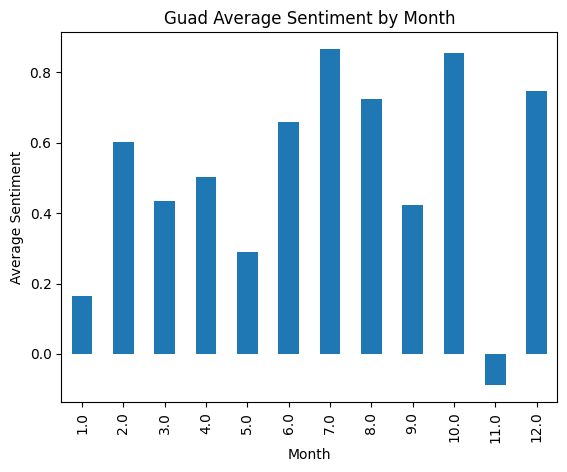

In [ ]:
# investigation into Guad
guad = season_df[season_df['Restaurant']=='Guad']
guad_monthly_average = guad.groupby('month')['sentiment'].mean()
guad_monthly_average.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.title('Guad Average Sentiment by Month')
plt.show()

Word Sentiment

This code finds key words in positive and negative reviews and creates a word cloud visualization.

In [ ]:
# import new packages
!pip install nltk
!pip install contractions
import nltk

nltk.download('punkt_tab')
nltk.download("vader_lexicon")

from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 11.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# organizing reviews into positive and negative categories
positive_reviews = pd.DataFrame(final_df[final_df['sentiment'] > 0.05])
negative_reviews = pd.DataFrame(final_df[final_df['sentiment'] < -0.05])

In [ ]:
# eliminate filler words (and, my, i, but, etc.) from reviews
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# fix contractions (don't, etc.)
def fix_contractions(text):
  text = str(text)
  return contractions.fix(text)

In [ ]:
# update dataframes
positive_reviews['Message'] = positive_reviews['Message'].apply(fix_contractions)
negative_reviews['Message'] = negative_reviews['Message'].apply(fix_contractions)

In [ ]:
# extract most popular words
def words(reviews, n=25):
  all_words = []
  for review in reviews:
    words = word_tokenize(review.lower())
    filtered_words = [
        word for word in words if word not in stop_words
        and len(word) > 2]
    all_words.extend(filtered_words)

  common_words = Counter(all_words).most_common(n)
  return common_words

In [ ]:
# create positive and negative key word lists of 25 words
positive_words = words(positive_reviews['Message'], n=25)
negative_words = words(negative_reviews['Message'], n=25)

In [ ]:
# show new word lists
print("common positive words:", positive_words)
print("common negative words:", negative_words)

common positive words: [('food', 1760), ('great', 1437), ('good', 1407), ('service', 980), ('place', 927), ('would', 892), ('delicious', 789), ('restaurant', 740), ('like', 694), ('also', 689), ('really', 670), ('one', 657), ('ordered', 638), ('time', 617), ('back', 610), ('got', 609), ('menu', 587), ('nice', 543), ('well', 542), ('came', 521), ('get', 521), ('definitely', 517), ('amazing', 513), ('charlottesville', 495), ('best', 481)]
common negative words: [('food', 156), ('service', 97), ('would', 82), ('restaurant', 65), ('good', 63), ('order', 62), ('table', 61), ('one', 59), ('time', 54), ('ordered', 51), ('back', 49), ('place', 48), ('like', 47), ('got', 42), ('minutes', 42), ('never', 42), ('asked', 37), ('...', 34), ('two', 32), ('get', 32), ('said', 32), ('great', 32), ('people', 32), ('came', 30), ('menu', 30)]


In [ ]:
# visualize as word cloud
from wordcloud import WordCloud

def wordcloud(words):
  words = dict(words)
  image = WordCloud(background_color='white').generate_from_frequencies(words)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

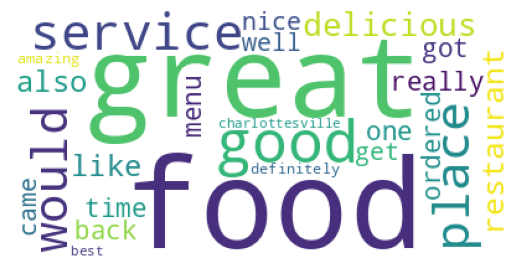

In [ ]:
# positive reviews
wordcloud(positive_words)

observations: emphasis on descriptive words like great, good, delicious

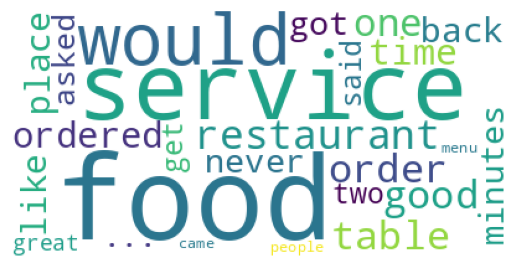

In [ ]:
# negative reviews
wordcloud(negative_words)

observations: emphasis on factors involved like food, service, time, table, restaurant